# 2.0.0 Generating the Shapiro Graph

Place to work on generating the graph laid out in the [Shapiro paper](https://www.nature.com/articles/nn.3331#Sec16).

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [1]:
# Load `watermark` extension
%load_ext watermark
# Display the status of the machine and packages. Add more as necessary.
%watermark -v -n -m -g -b -t -p numpy,matplotlib,seaborn,networkx

Sun Aug 16 2020 00:06:05 

CPython 3.8.5
IPython 7.16.1

numpy 1.19.1
matplotlib 3.2.2
seaborn 0.10.1
networkx 2.4

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : b0a1d8aac54c6bc327753165cb84dd2fa1f29657
Git branch : master


Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [2]:
# Load `autoreload` extension
%load_ext autoreload
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [3]:
# Set the matplotlib mode
%matplotlib inline

## Imports

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

## Visualizing Graphs

In [5]:
G = nx.petersen_graph()

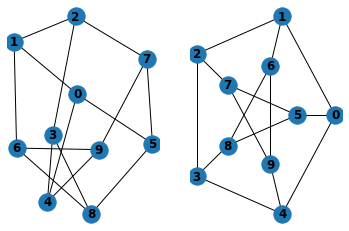

In [6]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

## Adding Nodes

In [21]:
G = nx.Graph()

In [22]:
G.add_node(1)

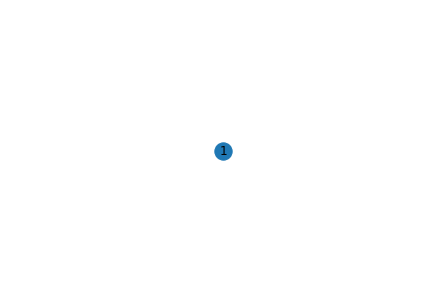

In [23]:
nx.draw(G, with_labels=True)

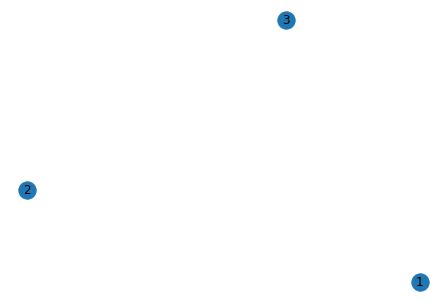

In [24]:
G.add_nodes_from([2,3])
nx.draw(G, with_labels=True)

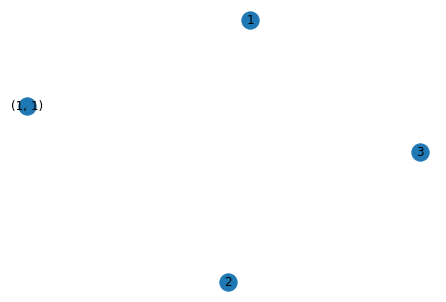

In [25]:
G.add_node((1,1))
nx.draw(G, with_labels=True)

## Removing Nodes

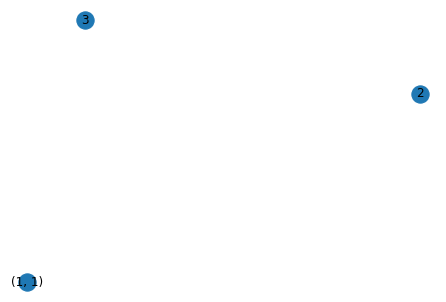

In [26]:
G.remove_node(1)
nx.draw(G, with_labels=True)

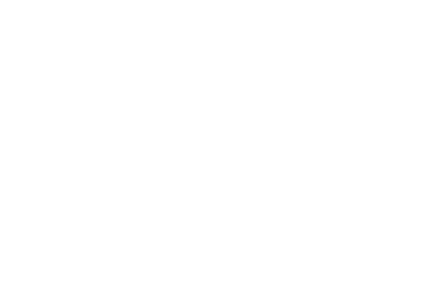

In [27]:
G.remove_nodes_from(list(G.nodes))
nx.draw(G, with_labels=True)

## Edges

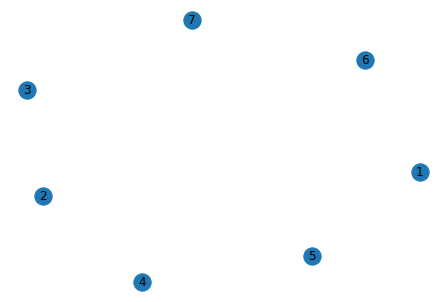

In [42]:
G.add_nodes_from([1,2,3,4,5,6,7])
nx.draw(G, with_labels=True)

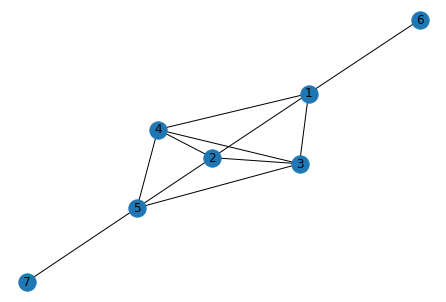

In [48]:
G.add_edges_from((
    (1,2), (1,3), (1,4), (1,6),
    (2,3), (2,4), (2,5),
    (3,4), (3,5),
    (4,5),
    (5,7),
))
nx.draw(G, with_labels=True)

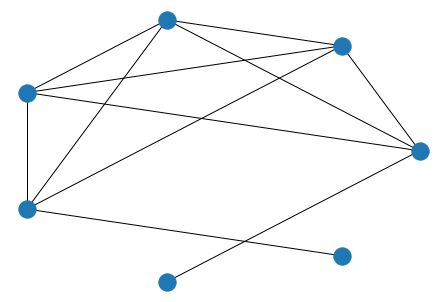

In [50]:
nx.draw_circular(G, with_labesl=True)

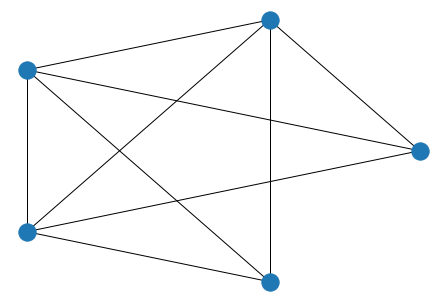

In [51]:
G.remove_nodes_from([6,7])
nx.draw_circular(G)

## The Shapiro Graph

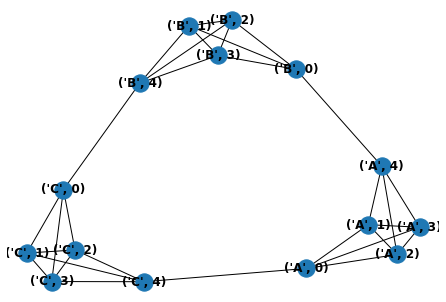

In [112]:
#def graph_pentagon(label='A'):

def graph_pentagon(label='A'):
    G = nx.Graph()
    G.add_nodes_from(zip([label]*5, range(5)))

    nodes_list = list(G.nodes)
    border_nodes = [nodes_list[0], nodes_list[-1]]
    for i, node_1 in enumerate(nodes_list[:-1]):
        for node_2 in nodes_list[i+1:]:
            if node_1 in border_nodes and node_2 in border_nodes: 
                continue
            G.add_edge(node_1, node_2)
    return G

def graph_shapiro(labels='ABC'):
    G = nx.Graph()

    for label in labels:
        pentagon = graph_pentagon(label)
        G.add_nodes_from(pentagon)
        G.add_edges_from(pentagon.edges)

    for i, label in enumerate(labels[:-1]):
        G.add_edge((label,4), (labels[i+1],0))
        G.add_edge((label,0), (labels[i-1],4))

    return G

G = graph_shapiro()
nx.draw(G, with_labels=True, font_weight='bold')

## Random Walks

In [88]:
G.nodes

NodeView((<networkx.classes.graph.Graph object at 0x7f47d4884970>, <networkx.classes.graph.Graph object at 0x7f47d4884850>))

In [80]:
nodes_list

[('A', 0), ('A', 1), ('A', 2), ('A', 3), ('A', 4)]